XGBoost - Cross-Validation Accuracy Scores: ['0.55804', '0.55574', '0.55574', '0.54625', '0.48699']
XGBoost - Mean CV Accuracy: 0.54055

XGBoost - Test Set Metrics:
Accuracy: 0.93915
Recall: 0.93651
Precision: 0.95414
F1-score: 0.94524

Перевірка завантаженої моделі:
Accuracy: 0.93915


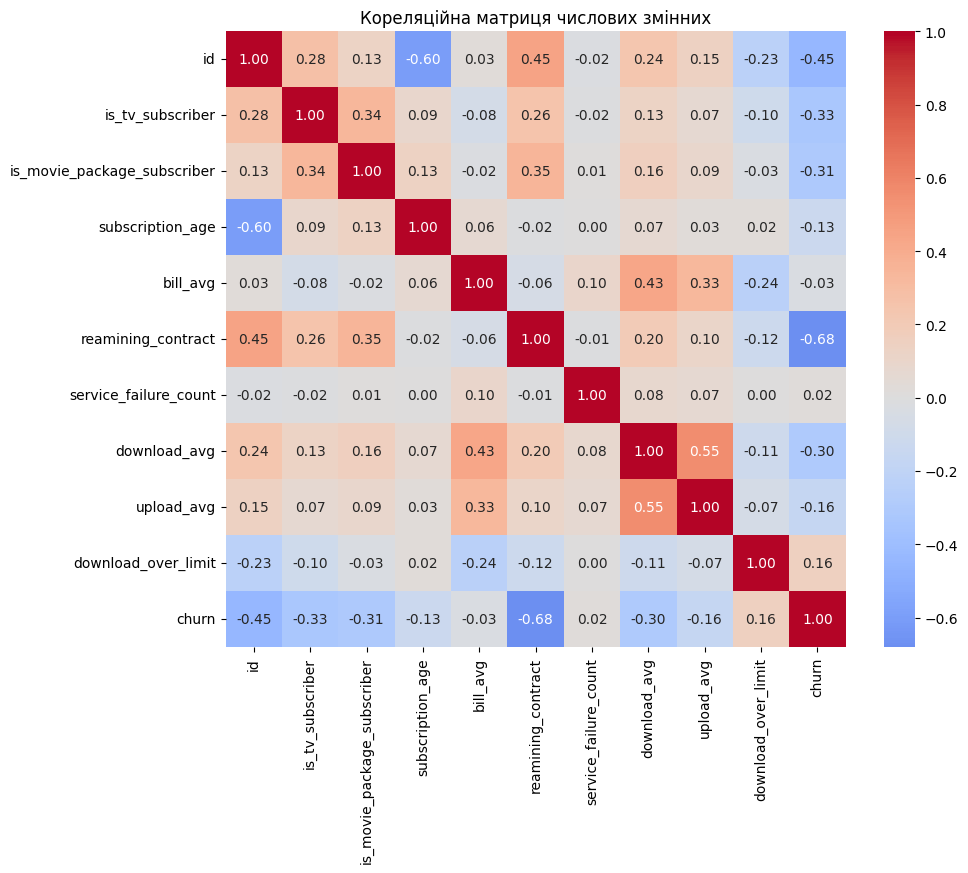

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib

# Завантаження та підготовка даних
data = pd.read_csv('data_normalized.csv')
X = data.drop(columns=['id', 'churn'])
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Налаштування моделі
best_params = {
    'n_estimators': 150,
    'max_depth': 6,
    'learning_rate': 0.05,
    'subsample': 0.9,
    'colsample_bytree': 0.85,
    'random_state': 42,
    'n_jobs': -1,
    'eval_metric': 'logloss'
}
model = XGBClassifier(**best_params)

# Крос-валідація (повернено назад)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("XGBoost - Cross-Validation Accuracy Scores:", [f"{score:.5f}" for score in cv_scores])
print(f"XGBoost - Mean CV Accuracy: {cv_scores.mean():.5f}\n")

# Тренування моделі
model.fit(X_train, y_train)

# Оцінка на тестовому наборі
y_pred = model.predict(X_test)
print("XGBoost - Test Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"F1-score: {f1_score(y_test, y_pred):.5f}\n")

# Збереження моделі
model.save_model('xgboost_model.json')
joblib.dump(model, 'xgboost_model.joblib')

# Перевірка завантаженої моделі
loaded_model = XGBClassifier()
loaded_model.load_model('xgboost_model.json')
y_pred_loaded = loaded_model.predict(X_test)
print("Перевірка завантаженої моделі:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded):.5f}")

# Кореляційна матриця
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Кореляційна матриця числових змінних')
plt.show()